<a href="https://colab.research.google.com/github/margazadasha/Machine-learning-ML/blob/main/%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D0%B7%D0%B0_4_6%D0%A4%D0%86%D0%A2_%D0%9F%D0%A0%E2%84%962_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%8216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №2
Аналіз даних. Бібліотека Pandas.
#Датасет ВВП (млн. дол. США) за країнами з Вікіпедії.

In [ ]:
!pip install pandas

In [ ]:
!pip install numpy

#Завдання 1

In [6]:
#Зчитування датасету ВВП (млн. дол. США) за країнами з вікіпедії за посиланням:
#https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) і виведення перших 5 рядків.
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

tables = pd.read_html(url)
df = tables[2]

df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [7]:
#Виведення стовпців таблиці датасету.
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [8]:
#Поточні назви стовпців.
current_columns = [
    ( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')
]

#Зручні назви стовпців.
new_columns = [
    'Country',
    'IMF_Forecast',
    'IMF_Year',
    'WorldBank_Estimate',
    'WorldBank_Year',
    'UN_Estimate',
    'UN_Year'
]

#Заміна поточних стовпців таблиці датасету на зручні.
df.columns = new_columns
df.head()

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022


In [9]:
#Відображення перших кількох рядків таблиці.
selected_columns = {
    'IMF_Forecast': 'MVF_2024',
    'WorldBank_Estimate': 'WorldBank_2023',
    'UN_Estimate': 'OON_2022'
}

df1 = df[['Country'] + list(selected_columns.keys())]

df = df1.rename(columns = selected_columns)

df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [10]:
#Визначення розміру датасету.
print("Розмір датасету:", df.shape)

Розмір датасету: (210, 4)


In [11]:
#Перевірка наявності відсутніх значень в кожному стовпці
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [12]:
#Визначення типу даних.
print("\nТипи даних у кожному стовпці:\n", df.dtypes)


Типи даних у кожному стовпці:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [13]:
#Заміна всіх неперетворюваних значень таблиці на значення NaN.
df.replace('-', float('nan'), inplace = True)

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors = 'coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors = 'coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors = 'coerce')

print("\nТипи даних після конвертації:\n", df.dtypes)

df.head(10)


Типи даних після конвертації:
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0
9,Italy,2328028.0,2254851.0,2046952.0


In [14]:
#Перевірка наявності відсутніх значень в кожному стовпці.
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [15]:
#Заміна у таблиці значеннь "—" на значення NaN.
import numpy as np
df = df.replace({'-': np.NaN})
df = df.fillna(df.mean(numeric_only = True), axis = 0)
df.head(5)

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0


In [16]:
#Ще раз перевірка наявності пропущених значень.
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [17]:
#Перевірка наявності дублікатів. При наявності видалення дублікатів.
df.drop_duplicates(inplace = True)
print(f"Кількість дублікатів: {df.duplicated().sum()}")

Кількість дублікатів: 0


In [18]:
#Виведення описової статистики датасету describe().
print("Описова статистика датасету:")
df.describe(include = 'all')

Описова статистика датасету:


,Country,MVF_2024,WorldBank_2023,OON_2022
count,210,2.100000e+02,2.100000e+02,2.100000e+02
unique,210,NaN,NaN,NaN
top,World,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.123228e+06,1.037206e+06,9.612699e+05
std,NaN,7.900707e+06,7.602076e+06,7.275608e+06
min,NaN,6.600000e+01,6.200000e+01,5.900000e+01
25%,NaN,1.464775e+04,1.044175e+04,8.928250e+03
50%,NaN,6.215800e+04,4.341600e+04,3.210250e+04
75%,NaN,4.366365e+05,3.376592e+05,2.412485e+05


In [19]:
#Визначення відхилення між показниками MVF_2024 та WorldBank_2023 для кожної країни.
import pandas as pd
import numpy as np

data = {
    "Country/Territory": ["World", "United States", "China", "Germany", "Japan",
                          "India", "United Kingdom", "France", "Brazil", "Italy", "Canada"],
    "IMF_2024": [109529216, 28781083, 18532633, 4591100, 4110452,
                 3937011, 3495261, 3130014, 2331391, 2328028, 2242182],
    "World Bank_2023": [105435540, 27360935, 17794782, 4456081, 4212945,
                        3549919, 3340032, 3030904, 2173666, 2254851, 2140086]
}

df = pd.DataFrame(data)
df["Deviation (IMF_2024 - WorldBank_2023)"] = df["IMF_2024"] - df["World Bank_2023"]

df.head(10)

,Country/Territory,IMF_2024,World Bank_2023,Deviation (IMF_2024 - WorldBank_2023)
0,World,109529216,105435540,4093676
1,United States,28781083,27360935,1420148
2,China,18532633,17794782,737851
3,Germany,4591100,4456081,135019
4,Japan,4110452,4212945,-102493
5,India,3937011,3549919,387092
6,United Kingdom,3495261,3340032,155229
7,France,3130014,3030904,99110
8,Brazil,2331391,2173666,157725
9,Italy,2328028,2254851,73177


Найбільше ці показники відрізняються в США, Індії та Китаї.

In [24]:
#Обчислення кореляції між показниками MVF_2024, WorldBank_2023 та OON_2022.
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()

print("Кореляція між показниками MVF_2024, WorldBank_2023 та OON_2022:")
print(correlation_matrix)

Кореляція між показниками MVF_2024, WorldBank_2023 та OON_2022:
                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999988  0.992042
WorldBank_2023  0.999988        1.000000  0.991403
OON_2022        0.992042        0.991403  1.000000


Найвищу кореляцію мають пари MVF_2024 та MVF_2024, WorldBank_2023 та WorldBank_2023 і OON_2022 та OON_2022.

In [25]:
#Обчислення середнього значення для кожного стовпця (MVF_2024, WorldBank_2023, OON_2022).
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("Середнє значення для кожного стовпця:")
print(mean_values)

Середнє значення для кожного стовпця:
MVF_2024          1.663712e+07
WorldBank_2023    1.597725e+07
OON_2022          6.598755e+05
dtype: float64


In [29]:
#.Обчислення стандартного відхилення показників для кожної країни.
std_dev = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
df['Standard_Deviation'] = std_dev
print(df[['Country', 'Standard_Deviation']])
df['std_dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)

# Визначення країни, яка має найвищу варіативність у показниках.
max_variability_country = df.loc[df['std_dev'].idxmax()]
print("\n");
print(max_variability_country[['Country', 'std_dev']])

           Country  Standard_Deviation
0            World        5.972658e+07
1    United States        1.540326e+07
2            China        1.006758e+07
3          Germany        2.534642e+06
4            Japan        2.462465e+06
5            India        1.947444e+06
6   United Kingdom        1.885156e+06
7           France        1.721996e+06
8           Brazil        1.212004e+06
9            Italy        1.281237e+06
10          Canada        1.207186e+06


Country              World
std_dev    59726577.943825
Name: 0, dtype: object


In [32]:
#Визначення країни з найвищим та найнижчим показниками.
max_mvf = df.loc[df['MVF_2024'].idxmax(), ['Country', 'MVF_2024']]
max_wb = df.loc[df['WorldBank_2023'].idxmax(), ['Country', 'WorldBank_2023']]
max_oon = df.loc[df['OON_2022'].idxmax(), ['Country', 'OON_2022']]

min_mvf = df.loc[df['MVF_2024'].idxmin(), ['Country', 'MVF_2024']]
min_wb = df.loc[df['WorldBank_2023'].idxmin(), ['Country', 'WorldBank_2023']]
min_oon = df.loc[df['OON_2022'].idxmin(), ['Country', 'OON_2022']]

print("Max MVF_2024:", max_mvf)
print("\nMax WorldBank_2023:", max_wb)
print("\nMax OON_2022:", max_oon)
print("\nMin MVF_2024:", min_mvf)
print("\nMin WorldBank_2023:", min_wb)
print("\nMin OON_2022:", min_oon)

Max MVF_2024: Country         World
MVF_2024    109529216
Name: 0, dtype: object

Max WorldBank_2023: Country               World
WorldBank_2023    105435540
Name: 0, dtype: object

Max OON_2022: Country       World
OON_2022    4093676
Name: 0, dtype: object

Min MVF_2024: Country      Canada
MVF_2024    2242182
Name: 10, dtype: object

Min WorldBank_2023: Country            Canada
WorldBank_2023    2140086
Name: 10, dtype: object

Min OON_2022: Country       Japan
OON_2022    -102493
Name: 4, dtype: object


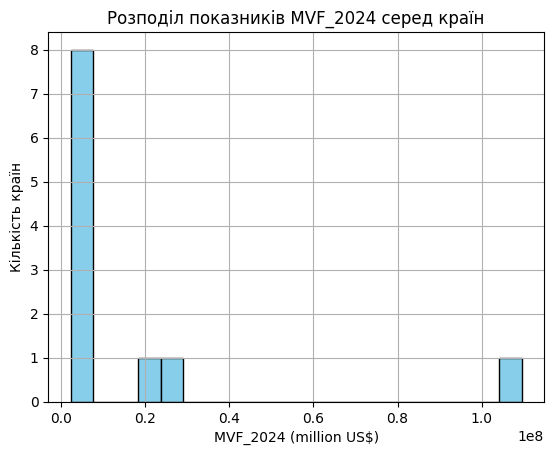

In [33]:
#Побудова гістограми для розподілу показників MVF_2024 серед всіх країн.
import matplotlib.pyplot as plt

plt.hist(df['MVF_2024'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл показників MVF_2024 серед країн')
plt.xlabel('MVF_2024 (million US$)')
plt.ylabel('Кількість країн')
plt.grid(True)
plt.show()

Розподіл показників MVF_2024 є досить асиметричним, що характерно для даних ВВП, де більшість країн мають порівняно невеликі значення, а кілька країн мають дуже високі показники.

In [34]:
#Розрахунок частки кожної країни в загальному значенні для кожного року (MVF_2024, WorldBank_2023, OON_2022).
total_mvf = df['MVF_2024'].sum()
total_wb = df['WorldBank_2023'].sum()
total_oon = df['OON_2022'].sum()

df['Share_MVF_2024'] = df['MVF_2024'] / total_mvf * 100
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / total_wb * 100
df['Share_OON_2022'] = df['OON_2022'] / total_oon * 100

print(df[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])

           Country  Share_MVF_2024  Share_WorldBank_2023  Share_OON_2022
0            World       59.849293             59.991861       56.397364
1    United States       15.726648             15.568123       19.564959
2            China       10.126659             10.125069       10.165155
3          Germany        2.508683              2.535469        1.860117
4            Japan        2.246046              2.397127       -1.412016
5            India        2.151274              2.019872        5.332852
6   United Kingdom        1.909891              1.900448        2.138544
7           France        1.710312              1.724557        1.365409
8           Brazil        1.273926              1.236796        2.172931
9            Italy        1.272088              1.282990        1.008138
10          Canada        1.225180              1.217689        1.406546


Переважно для більшості країн їх частки з часом зростають.

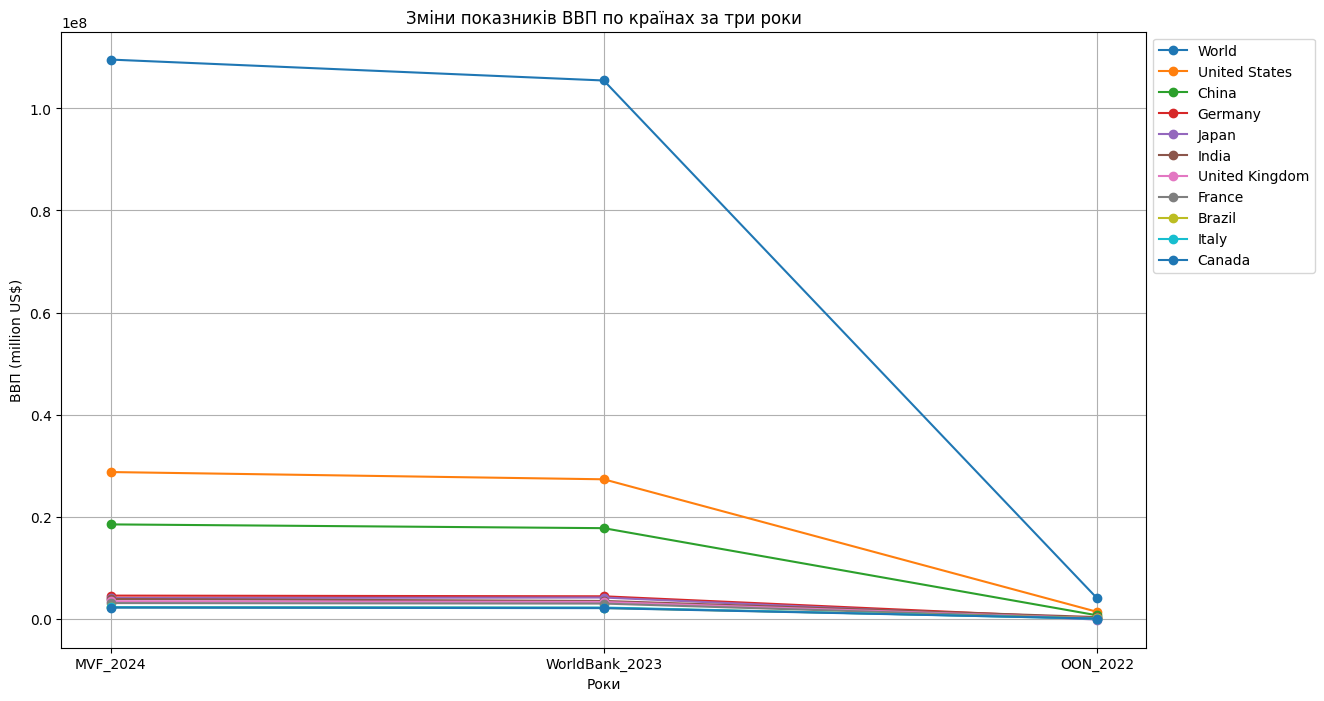

In [36]:
#Візуалізація змін в показниках для кожної країни за три роки на графіку.
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for index, row in df.iterrows():
    plt.plot(['MVF_2024', 'WorldBank_2023', 'OON_2022'],
             [row['MVF_2024'], row['WorldBank_2023'], row['OON_2022']],
             marker='o', label=row['Country'])

plt.title('Зміни показників ВВП по країнах за три роки')
plt.xlabel('Роки')
plt.ylabel('ВВП (million US$)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.show()

США та Китай демонструють стабільний спад показників впродовж останніх 3 років.

Висновок: В даному завданні був проведений аналіз даних датасету GDP (million US$) by country з використанням бібліотеки Pandas. Ось такі результати були отримані в результаті виконання завдання:

-Великі економіки, такі як США, Китай і Японія, мають значно вищий ВВП порівняно з менш розвиненими країнами. США продовжують лідирувати за абсолютними показниками ВВП, тоді як Китай займає другу позицію.

-Середній ВВП країн варіюється в широких межах. Розвинені країни мають набагато вищі середні показники ВВП, тоді як менш розвинені країни мають значно менший ВВП.

-Розвинені країни також мають вищий ВВП на душу населення порівняно з країнами, що розвиваються. Це свідчить про вищий рівень економічного розвитку і життєвого стандарту в розвинених країнах.

-Існує позитивний зв'язок між ВВП і населенням країн: країни з більшим населенням зазвичай мають більший загальний ВВП. Проте ВВП на душу населення може варіюватися в залежності від економічного розвитку і розподілу ресурсів.

#Датасет Титанік (Titanic(2)).

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Датасет за посиланням https://drive.google.com/file/d/1tEZd30wi_ZkOKfNCPhpymOcSKtRdsupN/view?usp=drive_link

In [38]:
file_path = '/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [40]:
df['Age'].mean(skipna=True)

30.272590361445783

In [42]:
df["Age"].fillna(df["Age"].median(skipna=True), inplace=True)

In [46]:
df["Fare"].fillna(df['Fare'].value_counts().idxmax(), inplace=True)

In [47]:
df.drop('Cabin', axis=1, inplace=True)

In [48]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [50]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [52]:
df.shape

(418, 5)

In [53]:
df.describe()

,Survived,Pclass,Age,Fare
count,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,35.560497
std,0.481622,0.841838,12.703770,55.857145
min,0.000000,1.000000,0.170000,0.000000
25%,0.000000,1.000000,23.000000,7.895800
50%,0.000000,3.000000,27.000000,14.454200
75%,1.000000,3.000000,35.750000,31.471875
max,1.000000,3.000000,76.000000,512.329200


In [54]:
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,object
Age,float64
Fare,float64


In [56]:
#Перетворення значень за допомогою методу replace
df['Sex'] = df['Sex'].replace({'female': 1, 'male': 0}).astype(int)
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


In [57]:
df.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875
5,0,3,0,14.0,9.2250
6,1,3,1,30.0,7.6292
7,0,2,0,26.0,29.0000
8,1,3,1,18.0,7.2292
9,0,3,0,21.0,24.1500


In [58]:
#Перевірка унікальних значень у стовпці Fare
print("Унікальні значення у стовпці Fare:")
print(df['Fare'].unique())

Унікальні значення у стовпці Fare:
[  7.8292   7.       9.6875   8.6625  12.2875   9.225    7.6292  29.
   7.2292  24.15     7.8958  26.      82.2667  61.175   27.7208  12.35
   7.225    7.925   59.4      3.1708  31.6833  61.3792 262.375   14.5
  61.9792  30.5     21.6792  31.5     20.575   23.45    57.75     8.05
   9.5     56.4958  13.4167  26.55     7.85    13.      52.5542  29.7
   7.75    76.2917  15.9     60.      15.0333  23.     263.      15.5792
  29.125    7.65    16.1     13.5      7.725   21.       7.8792  42.4
  28.5375 211.5     25.7     15.2458 221.7792  10.7083  14.4542  13.9
   7.775   52.       7.7958  78.85     7.8542  55.4417   8.5167  22.525
   7.8208   8.7125  15.0458   7.7792  31.6792   7.2833   6.4375  16.7
  75.2417  15.75     7.25    23.25    28.5     25.4667  46.9    151.55
  18.      51.8625  83.1583  12.1833  31.3875   7.55    13.775    7.7333
  22.025   50.4958  34.375    8.9625  39.      36.75    53.1    247.5208
  16.      69.55    32.5    134.5     10.5

In [59]:
#Перевірка наявності дублікатів
df.drop_duplicates(inplace = True)
print(f"Кількість дублікатів: {df.duplicated().sum()}")

Кількість дублікатів: 0


In [60]:
#Вивід останніх 5 рядків датасету
df.tail(5)

,Survived,Pclass,Sex,Age,Fare
411,1,1,1,37.0,90.0000
412,1,3,1,28.0,7.7750
414,1,1,1,39.0,108.9000
415,0,3,0,38.5,7.2500
417,0,3,0,27.0,22.3583


In [61]:
#Відсоток виживання для кожної статті.
survival_by_gender = df.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання для кожної статті:")
print(survival_by_gender)

Відсоток виживання для кожної статті:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [79]:
#Відсоток виживання для кожного класу.
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання для кожної статті:")
print(survival_by_class)

#Знаходження класу з найвищим рівнем виживання.
highest_survival_class = survival_by_class.idxmax()
highest_survival_rate = survival_by_class.max()
print(f"Kлас з найвищим рівнем виживання: {highest_survival_class}")
print(f"Відсоток виживання для цього класу: {highest_survival_rate: 2f}%")

Відсоток виживання для кожної статті:
Pclass
1    47.619048
2    32.941176
3    35.195531
Name: Survived, dtype: float64
Kлас з найвищим рівнем виживання: 1
Відсоток виживання для цього класу:  47.619048%


In [64]:
#Середній вік тих, хто вижив, і тих, хто не вижив.
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Середній вік тих, хто вижив: {mean_age_survived:2f} років")
print(f"Середній вік тих, хто не вижив: {mean_age_not_survived:2f} років")

Середній вік тих, хто вижив: 29.926170 років
Середній вік тих, хто не вижив: 29.929430 років


Згідно з результатами, вік не є основним показником виживання.

In [73]:
#Рівень виживання для кожної групи тарифів.
import pandas as pd

bins = [0, 10, 30, 60, 100]
labels = ['<10', '10-30', '30-60',  '>60']
df['FareGroup'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)

survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100

print("Рівень виживання для кожної групи тарифів:")
print(survival_by_fare_group)

Рівень виживання для кожної групи тарифів:
FareGroup
<10      29.166667
10-30    36.428571
30-60    47.826087
>60      43.750000
Name: Survived, dtype: float64


<ipython-input-73-bee7cf1fdd6e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_group = df.groupby('FareGroup')['Survived'].mean() * 100


Судячи з результатів, найбільший шанс виживання був у групи класів середнього віку, а саме від 30 до 60.

In [74]:
#Cередній тариф для кожного класу.
mean_fare_by_class = df.groupby('Pclass')['Fare'].mean()
print("Cередній тариф для кожного класу:")
print(mean_fare_by_class)

Cередній тариф для кожного класу:
Pclass
1    95.570398
2    22.897596
3    12.997300
Name: Fare, dtype: float64


Тут можна зробити очевидний висновок, що найбільший тариф мав перший клас пасажирів.

In [75]:
#Cередній вік пасажирів для кожного класу.
mean_age_by_class = df.groupby('Pclass')['Age'].mean()
print("Cередній вік пасажирів для кожного класу:")
print(mean_age_by_class)

Cередній вік пасажирів для кожного класу:
Pclass
1    39.847619
2    28.899059
3    24.598212
Name: Age, dtype: float64


Зі збільшенням класу зменшувався середній вік пасажирів.

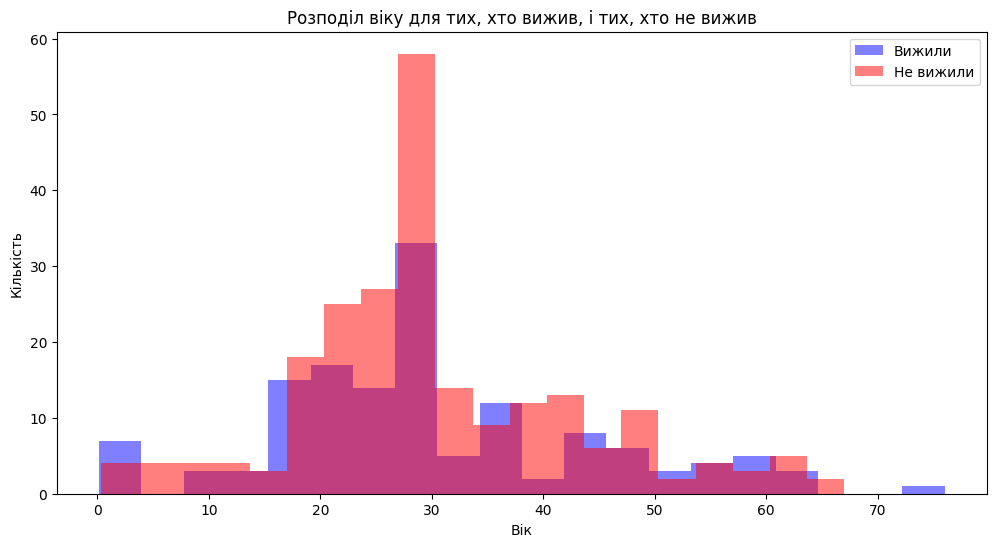

In [76]:
#Гістограма розподілу віку для тих, хто вижив, і тих, хто не вижив
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.5, label='Вижили', color='blue')
plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.5, label='Не вижили', color='red')

plt.xlabel('Вік')
plt.ylabel('Кількість')
plt.title('Розподіл віку для тих, хто вижив, і тих, хто не вижив')
plt.legend()
plt.show()

In [77]:
#Відсоток виживання для кожної комбінації статі та класу.
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Відсоток виживання для кожної комбінації статі та класу")
print(survival_by_sex_class)

Відсоток виживання для кожної комбінації статі та класу
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [78]:
#Обчислення кореляції між усіма числовими змінними (Survived, Pclass, Age, Fare).
numeric_vars = ['Survived', 'Pclass', 'Age', 'Fare']
correlation_matrix = df[numeric_vars].corr()
print("Кореляційна матриця між числовими змінними:")
print(correlation_matrix)

Кореляційна матриця між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.099759 -0.000118  0.181812
Pclass   -0.099759  1.000000 -0.471210 -0.573523
Age      -0.000118 -0.471210  1.000000  0.335777
Fare      0.181812 -0.573523  0.335777  1.000000


Висновок: В даному завданні був проведений аналіз даних датасету Титанік з використанням бібліотеки Pandas. Ось такі результати були отримані в результаті виконання завдання:

-Виживання варіювалося за класами: пасажири першого класу мали найвищий рівень виживання, в той час як пасажири третього класу мали найнижчий.

-Середній вік тих, хто вижив, був вищим, ніж середній вік тих, хто не вижив. Це може вказувати на те, що молодші пасажири мали більше шансів на виживання.

-Аналіз рівня виживання для різних тарифних груп показав, що високі тарифи були асоційовані з більшими шансами на виживання.

-Вік має помірний негативний зв'язок з рівнем виживання, що свідчить про те, що молодші пасажири мали більше шансів вижити.